In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')

In [2]:
import tensorflow as tf

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# EDA :

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


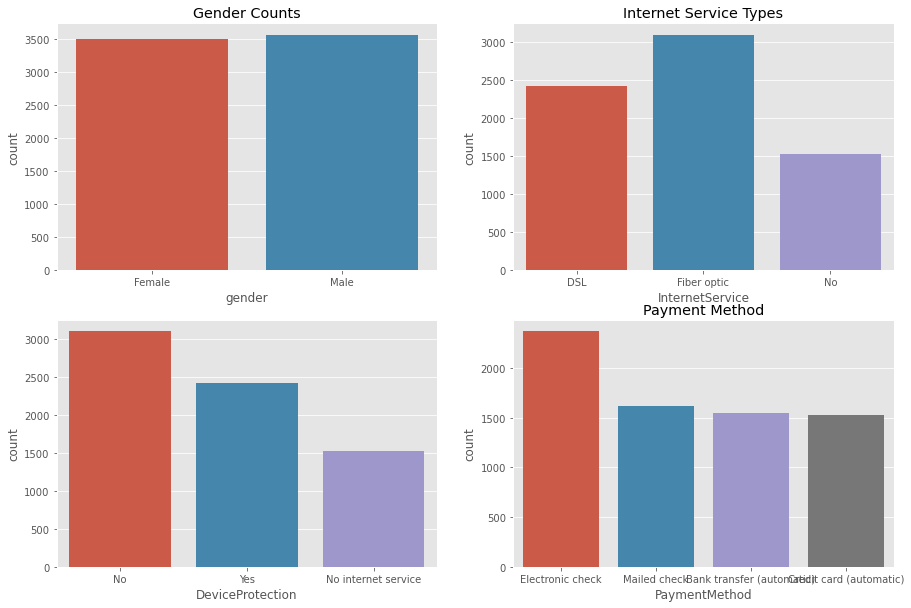

In [6]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Gender Counts')
sns.countplot(data=df, x='gender')
plt.subplot(2,2,2)
plt.title('Internet Service Types')
sns.countplot(data=df, x='InternetService');
plt.subplot(2,2,3)
sns.countplot(data=df, x='DeviceProtection');
plt.subplot(2,2,4)
plt.title('Payment Method')
sns.countplot(data=df, x='PaymentMethod');

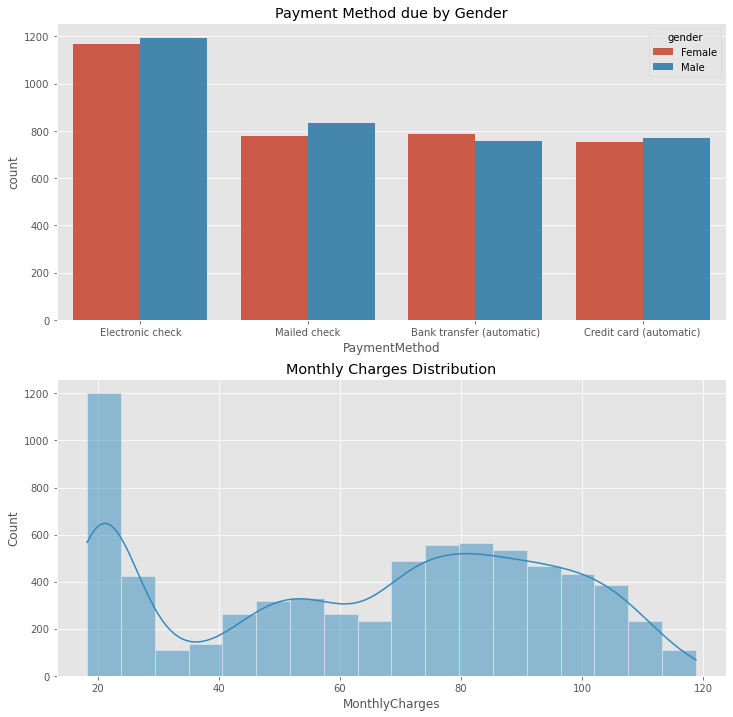

In [7]:
plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.title('Payment Method due by Gender')
sns.countplot(data=df, x='PaymentMethod', hue='gender');
plt.subplot(2,1,2)
plt.title('Monthly Charges Distribution')
sns.histplot(data=df, x='MonthlyCharges', kde=True);

In [8]:
female = df[df['gender'] == 'Female']
male = df[df['gender'] == 'Male']

Rata-rata cas laki-laki :  70.1
Rata-rata cas perempuan :  70.65


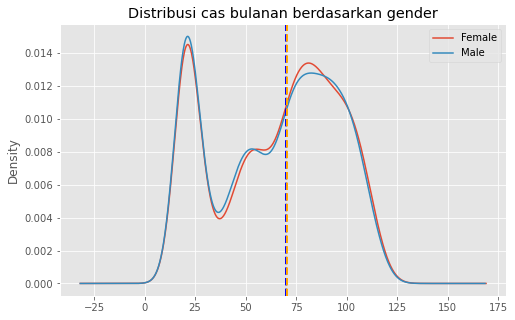

In [9]:
plt.figure(figsize=(8,5))
plt.title('Distribusi cas bulanan berdasarkan gender')
female['MonthlyCharges'].plot.kde(label='Female')
male['MonthlyCharges'].plot.kde(label='Male')
plt.axvline(np.median(male['MonthlyCharges']), linestyle='--', color='blue', lw=2)
plt.axvline(np.median(female['MonthlyCharges']), linestyle='--', color='orange', lw=2)
plt.legend();
print("Rata-rata cas laki-laki : ", np.median(male['MonthlyCharges']))
print("Rata-rata cas perempuan : ", np.median(female['MonthlyCharges']))

### Perempuan cenderung lebih banyak spendings dibanding dengan laki-laki.

In [10]:
partnermale = male.loc[male['Partner'] == 'Yes']
partnerfemale = female.loc[female['Partner'] == 'Yes']

### Laki-laki yang berpasangan cenderung memiliki spendings lebih banyak dibanding dengan perempuan berpasangan.

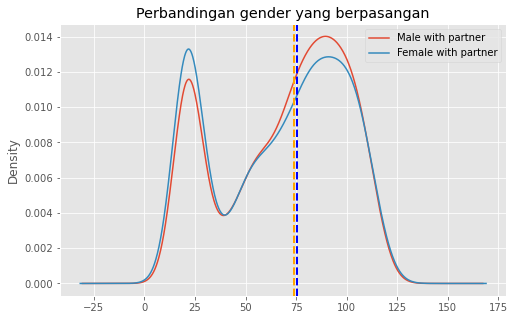

In [11]:
plt.figure(figsize=(8,5))
plt.title('Perbandingan gender yang berpasangan')
partnermale['MonthlyCharges'].plot.kde(label='Male with partner')
partnerfemale['MonthlyCharges'].plot.kde(label='Female with partner')
plt.axvline(np.median(partnermale['MonthlyCharges']), linestyle='--', color='blue', lw=2)
plt.axvline(np.median(partnerfemale['MonthlyCharges']), linestyle='--', color='orange', lw=2)
plt.legend();

In [12]:
print("Nilai tengah Churn :", df['MonthlyCharges'].median())

Nilai tengah Churn : 70.35


# Analisis Churn :
- Churn merupakan orang-orang yang sudah memutuskan hubungan untuk servicenya.

In [13]:
aboveMC = df.loc[df['MonthlyCharges'] >= 70.35]
belowMC = df.loc[df['MonthlyCharges'] < 70.35]

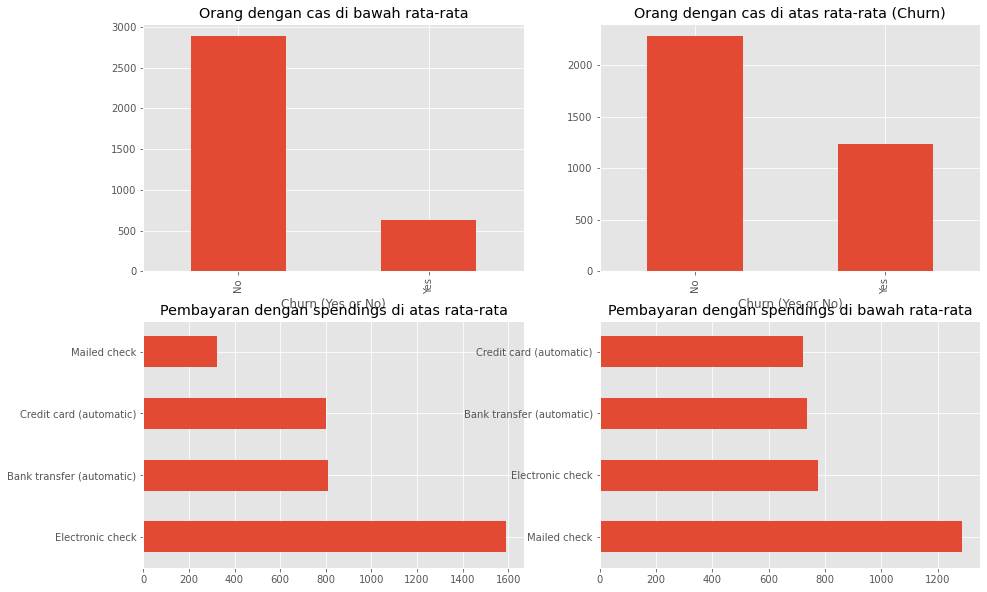

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Orang dengan cas di bawah rata-rata')
belowMC['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn (Yes or No)');
plt.subplot(2,2,2)
plt.title('Orang dengan cas di atas rata-rata (Churn)')
aboveMC['Churn'].value_counts().plot(kind='bar')
plt.xlabel('Churn (Yes or No)');
plt.subplot(2,2,3)
plt.title('Pembayaran dengan spendings di atas rata-rata')
aboveMC['PaymentMethod'].value_counts().plot(kind='barh');
plt.subplot(2,2,4)
plt.title('Pembayaran dengan spendings di bawah rata-rata')
belowMC['PaymentMethod'].value_counts().plot(kind='barh');

### Terlihat kalau orang yang menggunakan pembaryaran berupa elektronik cenderung dikenakan cas lebih banyak di banding dengan kategori lainnya.

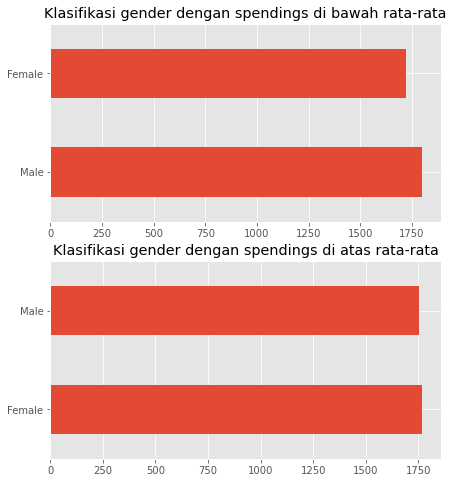

In [15]:
plt.figure(figsize=(7,8))
plt.subplot(2,1,1)
plt.title('Klasifikasi gender dengan spendings di bawah rata-rata')
belowMC['gender'].value_counts().plot(kind='barh');
plt.subplot(2,1,2)
plt.title('Klasifikasi gender dengan spendings di atas rata-rata')
aboveMC['gender'].value_counts().plot(kind='barh');

### Mengapa menggunakan median ?
- Karena data tersebut tidak terdistribusi dengan normal, maka akan digunakan median. (jika mengguanakan rata-rata/mean, akan bisa menyebabkan misleading untuk penarikan kesimpulan).

### Pada orang yang dengan spendings di bawah rata-rata, terlihat kalau laki-laki lebih banyak di banding dengan perempuan.

### Sedangkan untuk spendings dengan di atas rata-rata, terlihat kalau kedua gender memiliki nilai yang sama/mirip.

- Ini bisa dijadikan alasan mengapa pada density plot kedua gender memiliki nilai yang mirip-mirip, namun saat di bagi menjadi 2 kelompok (di atas rata-rata dan di bawah), terlihat kalau spendings yang sedikit cenderung lebih banyak pada laki-laki.

# Kesimpulan EDA :
-  Orang-orang  yang meninggalkan service cenderung menghabiskan spendings lebih banyak dibanding dengan orang yang dengan spendings di bawah rata-rata.
- Orang-orang yang memiliki spendings lebih banyak cenderung merupakan perempuan.
- Charge di atas rata-rata cenderung menggunakan pembayaran dengan alat elektronik.
- Charge di bawah rata-rata cenderung menggunakan pembayaran dengan mailed check.


- Namun, metode pembayaran tidak bisa dijadikan patokan jika seseorang akan dikenakan cas lebih tinggi.

In [16]:
print("Statistik Deskriptif perempuan :")
female.describe().transpose()

Statistik Deskriptif perempuan :


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3488.0,0.162844,0.369276,0.0,0.0,0.00,0.00,1.00
tenure,3488.0,32.244553,24.463233,0.0,9.0,29.00,55.00,72.00
MonthlyCharges,3488.0,65.204243,30.061341,18.4,35.9,70.65,89.85,118.75


In [17]:
print("Statistik Deskriptif laki-laki :")
male.describe().transpose()

Statistik Deskriptif laki-laki :


,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3555.0,0.161463,0.368009,0.00,0.000,0.0,0.000,1.00
tenure,3555.0,32.495359,24.656359,0.00,9.000,29.0,56.000,72.00
MonthlyCharges,3555.0,64.327482,30.116093,18.25,35.225,70.1,89.875,118.35


# Data Preprocessing & Feature Selection :

In [18]:
del df['customerID']

In [19]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [20]:
le = LabelEncoder()

In [21]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Partner'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])

# y
df['Churn'] = le.fit_transform(df['Churn'])

In [22]:
new_df = df['Churn'].sample(frac=1, random_state=42)

# Feature Selection :

## Correlation Matrix :

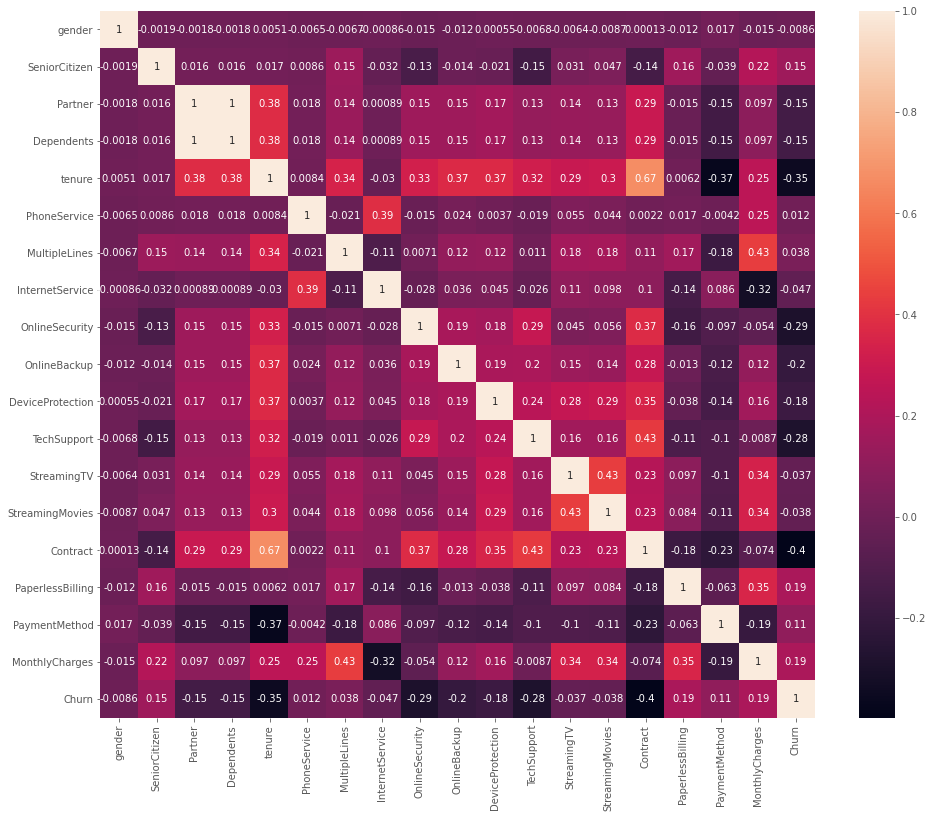

In [23]:
plt.figure(figsize=(16,13))
sns.heatmap(df.corr(), annot=True);

### Kolom yang memiliki korelasi yang mirip/sama dengan y.
- MonthlyCharges, PaperlessBilling
- StreamingTV, StreamingMovies
- OnlineSecurity, TechSupport
- OnlineBackup, DeviceProtection
- Partner, Dependents

In [24]:
del df['MonthlyCharges']
del df['TotalCharges']
del df['StreamingTV']
del df['OnlineSecurity']
del df['OnlineBackup']
del df['Partner']

In [25]:
corr_mat = df.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]]
y = df.iloc[:,13]

## Chi Square untuk seleksi fitur :
P-Value : < 0.05
- HA : Data bagus untuk label (untuk dijadikan model)
- H0 : Data tidak bagus untuk label (untuk dijadikan model)

In [26]:
from sklearn.feature_selection import chi2

In [27]:
f_stat, p_val = chi2(corr_mat, y)
p_val.round(5)

array([0.61102, 0.     , 0.     , 0.     , 0.75514, 0.0018 , 0.00173,
       0.     , 0.     , 0.00411, 0.     , 0.     , 0.     ])

### fitur kolom pertama dan kolom ke-5 gagal di tolak, maka akan di remove.

In [28]:
X = corr_mat.iloc[:, [1,2,3,5,6,7,8,9,10,11]]

In [29]:
f_stat, p_val = chi2(X, y)
p_val.round(5) # H1 berhasil diterima.

array([0.     , 0.     , 0.     , 0.0018 , 0.00173, 0.     , 0.     ,
       0.00411, 0.     , 0.     ])

# Split Data :

In [30]:
no = (5174/(5174+1869)) * 100
yes = (1869/(5174+1869)) * 100
print("No :", no, '%')
print("Yes :", yes, '%')

No : 73.4630129206304 %
Yes : 26.536987079369588 %


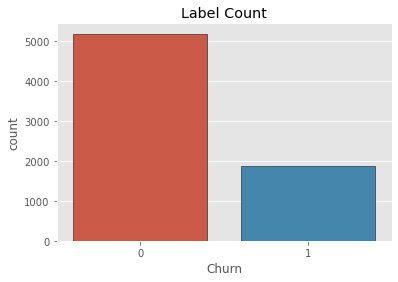

In [31]:
plt.title('Label Count')
sns.countplot(data=df, x='Churn', edgecolor='k');

In [32]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.model_selection import KFold, GridSearchCV

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=1)

In [34]:
y_train = y_train.astype('int64')
y_val = y_val.astype('int64')
y_test = y_test.astype('int64')

In [35]:
X_train1 = X_train # for oversampling feature

In [36]:
train_cat = tf.keras.utils.to_categorical(y_train, num_classes=2)
val_cat = tf.keras.utils.to_categorical(y_val, num_classes=2)
test_cat = tf.keras.utils.to_categorical(y_test, num_classes=2)

In [37]:
import tensorflow as tf
from tensorflow import keras
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping

import datetime
import os

In [38]:
print("y classification : \n", df['Churn'].value_counts())

y classification : 
 0    5174
1    1869
Name: Churn, dtype: int64


# Tujuan dari model :
- Memprediksi apakah suatu individu akan putus servis atau tidak.

# Pendefinisian model :

- class weight digunakan untuk menginisialkan kalau dataset memiliki sifat imbalance.

In [39]:
def create_class_weight(zero, one):
    weight_for_0 = (1 / zero) * ((zero + one) / 2.0)
    weight_for_1 = (1 / one) * ((zero + one) / 2.0)
    return {0 : weight_for_0, 1 : weight_for_1}

class_weight = create_class_weight(5174, 1869)

In [40]:
METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.BinaryAccuracy(name='accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
    metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [41]:
def make_model(metrics=METRICS): #model
    model = Sequential()
    model.add(Flatten(input_shape=[10]))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(4, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(2, activation='sigmoid'))
    # Compiling model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(amsgrad=True), metrics=metrics, sample_weight_mode='temporal')
    return model

# Feature Engineering :
### Feature Engineering di sini akan digunakan 2 :
- MinMaxScaler : meng-scale nilai dari setiap fitur menjadi 0 sampai 1. (ini juga merupakan solusi untuk mengatasi label encoder)
- RobustScaler : meng-scale nilai outlier menjadi kuartil-1 (25%) dan kuartil-3 (75%).

In [42]:
minmax = MinMaxScaler()
rs = RobustScaler()

In [43]:
mX_train = minmax.fit_transform(X_train)
mX_train = rs.fit_transform(mX_train)

mX_val = minmax.transform(X_val)
mX_val = rs.transform(mX_val)

mX_test = minmax.transform(X_test)
mX_test = rs.transform(mX_test)

## Callbacks :
- Karena tidak menggunakan regularisasi (l1 maupun l2), akan digunakan early-stopping.
- Untuk mencegah overfit.
- Cara early-stopping juga lebih efektif untuk dataset tersebut. (karena datasetnya masih kehitung size kecil untuk neural network).

In [44]:
early_stopping = keras.callbacks.EarlyStopping(monitor='val_prc', patience=10, restore_best_weights=True)

In [45]:
model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 4)                 68        
                                                                 
 dense_4 (Dense)             (None, 2)                 10        
                                                                 
Total params: 3,390
Trainable params: 3,390
Non-trainabl

In [46]:
history = model.fit(mX_train, train_cat, validation_data=(mX_val, val_cat), 
                    batch_size=1, epochs=100, callbacks=[early_stopping], class_weight=class_weight)

Epoch 1/100
4225/4225 [==============================] - 12s 2ms/step - loss: 0.5342 - tp: 3040.0000 - fp: 1154.0000 - tn: 3071.0000 - fn: 1185.0000 - accuracy: 0.7232 - precision: 0.7248 - recall: 0.7195 - auc: 0.8022 - prc: 0.7993 - val_loss: 0.4889 - val_tp: 1041.0000 - val_fp: 341.0000 - val_tn: 1068.0000 - val_fn: 368.0000 - val_accuracy: 0.7484 - val_precision: 0.7533 - val_recall: 0.7388 - val_auc: 0.8400 - val_prc: 0.8459 712.0000 - tn: 1829.0000 - fn: 725.0000 - accuracy: 0.7172 - precision: 0.7184 - rec - ETA: 1s - loss: 0.5410 - tp: 2569.0000 - fp: 995.0000 - tn: 2593.0000 - fn: 1019.0000 - accuracy: 0.7193 - precision: 0.7208 - recall: 0.7160 - a
Epoch 2/100
4225/4225 [==============================] - 9s 2ms/step - loss: 0.5052 - tp: 3186.0000 - fp: 1007.0000 - tn: 3218.0000 - fn: 1039.0000 - accuracy: 0.7579 - precision: 0.7598 - recall: 0.7541 - auc: 0.8255 - prc: 0.8255 - val_loss: 0.5030 - val_tp: 1069.0000 - val_fp: 334.0000 - val_tn: 1075.0000 - val_fn: 340.0000 - va

In [47]:
result = model.evaluate(mX_test, test_cat)

45/45 [==============================] - 1s 2ms/step - loss: 0.5311 - tp: 1013.0000 - fp: 360.0000 - tn: 1049.0000 - fn: 396.0000 - accuracy: 0.7317 - precision: 0.7378 - recall: 0.7189 - auc: 0.8058 - prc: 0.8053


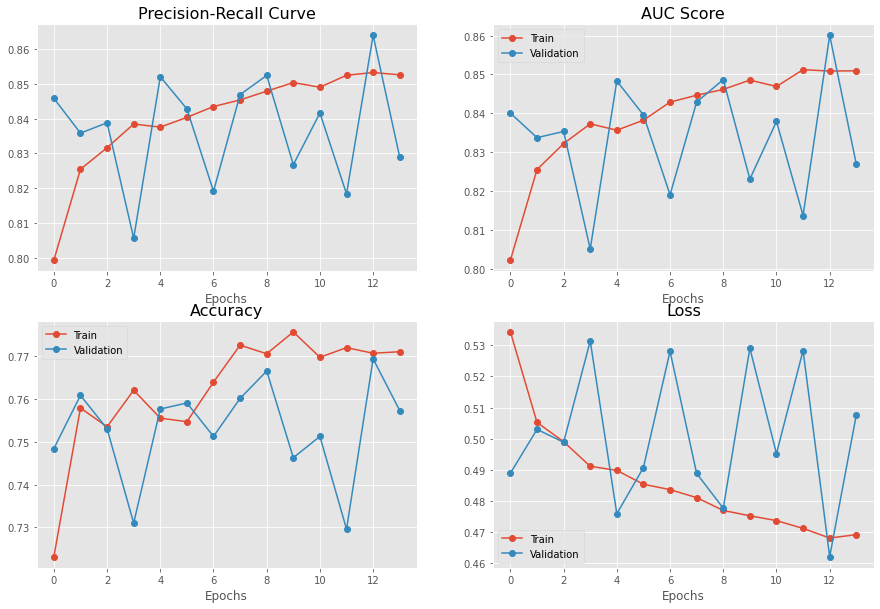

In [48]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Precision-Recall Curve', fontsize=16)
plt.plot(history.history['prc'], label='Train', marker='o')
plt.plot(history.history['val_prc'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.subplot(2,2,2)
plt.title('AUC Score', fontsize=16)
plt.plot(history.history['auc'], label='Train', marker='o')
plt.plot(history.history['val_auc'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.legend();
plt.subplot(2,2,3)
plt.title('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Train', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.legend();
plt.subplot(2,2,4)
plt.title('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Train', marker='o')
plt.plot(history.history['val_loss'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.legend();

# Pipeline :

In [49]:
clf = KerasClassifier(build_fn =make_model, epochs=20, batch_size=1)

<ipython-input-49-3190db55b7d5>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  clf = KerasClassifier(build_fn =make_model, epochs=20, batch_size=1)


In [50]:
pipeline = make_pipeline(
    MinMaxScaler(),
    RobustScaler(),
    clf
)

In [51]:
pipeline.fit(X_train, train_cat)

Epoch 1/20
4225/4225 [==============================] - 11s 2ms/step - loss: 0.4707 - tp: 4237.0000 - fp: 1420.0000 - tn: 4214.0000 - fn: 1397.0000 - accuracy: 0.7500 - precision: 0.7490 - recall: 0.7520 - auc: 0.8424 - prc: 0.84417s - loss: 0.6564 - tp: 1250.0000 - fp: 592.0000 - tn: 1076.0000 - fn: 418.0000 - accuracy: 0.6972 - pr - ETA: 5s - loss: 0.5147 - tp: 2319.0000 - fp: 924.0000 - tn: 2214.0000 - fn: 819. - ETA: 1s - loss: 0.4755 - tp: 3625.0000 - fp: 1259.0000 - tn: 3584.0000 - fn: 1218.0000 - accuracy: 0.7443 - precision: 0.7422 - recall: 0.7
Epoch 2/20
4225/4225 [==============================] - 8s 2ms/step - loss: 0.4326 - tp: 3315.0000 - fp: 831.0000 - tn: 3394.0000 - fn: 910.0000 - accuracy: 0.7940 - precision: 0.7996 - recall: 0.7846 - auc: 0.8796 - prc: 0.8803s - loss: 0.3879 - tp: 419.0000 - fp: 95.0000 - tn: 429.0000 - fn: 105.0000 - accuracy: 0.8092 - precision: 0.8152 - recall: 0.7996 - auc: 0.9025 -  - ETA: 6s - loss: 0.4091 - tp: 606.0000 - fp
Epoch 3/20
4225/42

4225/4225 [==============================] - 8s 2ms/step - loss: 0.3969 - tp: 3413.0000 - fp: 795.0000 - tn: 3430.0000 - fn: 812.0000 - accuracy: 0.8098 - precision: 0.8111 - recall: 0.8078 - auc: 0.8997 - prc: 0.9018A: 3s - loss: 0.3955 - tp: 1629.0000 - fp: 369.0000 - tn: 1634.0000 - fn: 374.0000 - accuracy: 0.8145 - precision: 0.8153 - recall: 0.8133 - auc: 0.9006 - prc: - ETA: 3s - loss: 0.3922 - tp: 1771.0000 - fp: 399.0000 - tn: 1777.0000 - fn: 405.0000 - accuracy: 0.8153 - precision: 0.8161 - reca - ETA: 1s - loss: 0.3876 - tp: 2680.0000 - fp: 607.0000 - tn: 2689.0000 - fn: 616.0000 - accuracy: 0.8145 - precision: 0.8153 - recall: 0.8131 - auc: 0.9043 - prc: 0.9 - ETA: 1s - loss: 0.3924 - tp: 2731.0000 - fp: 632.0000 - tn: 2740.0000 - fn: 641.0000 - accuracy: 0.8112 - precision: 0.8121 - recall: 0.8099 - auc: 0. - ETA: 0s - loss: 0.3983 - tp: 3128.0000 - fp: 735.0000 - tn: 3142.0000 - fn: 749.0000 - accuracy: 0.8086 - precision: 0.8097 - recall: 0.8068 - auc: 0.8989 


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('robustscaler', RobustScaler()),
                ('kerasclassifier',
                 <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f85ccb173a0>)])

## Resampling :
- Dikarenakan dataset tidak menghasilkan hasil yang memuaskan, akan digunakan teknik resampling.
- Teknik yang akan digunakan merupakan Over-sampling
- Dari segi domain/sifat bisnis, over-sampling lebih cocok digunakan dibandingkan dengan under-sampling.

In [52]:
from imblearn.over_sampling import RandomOverSampler

In [53]:
oversample = RandomOverSampler(sampling_strategy='minority')

In [54]:
X_over, y_over= oversample.fit_resample(X_train1, y_train)

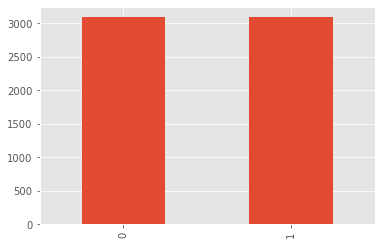

In [55]:
y_over.value_counts().plot(kind='bar');

In [56]:
mX_over = minmax.transform(X_over)
mX_over = rs.transform(mX_over)
y_over = tf.keras.utils.to_categorical(y_over, num_classes=2)

In [57]:
def model_oversample(metrics=METRICS): #model
    model = Sequential()
    model.add(Flatten(input_shape=[10]))
    model.add(Dense(64, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(32, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(16, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(2, activation='sigmoid'))
    # Compiling model
    model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(amsgrad=True), metrics=metrics)
    return model

In [58]:
clfs = model_oversample()

In [59]:
early_stopping2 = keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, restore_best_weights=True)

In [60]:
histories = clfs.fit(mX_over, y_over, validation_data=(mX_val, val_cat),
                     batch_size=1, epochs=100, callbacks=[early_stopping2])

Epoch 1/100
6180/6180 [==============================] - 15s 2ms/step - loss: 0.5133 - tp: 8010.0000 - fp: 2391.0000 - tn: 8014.0000 - fn: 2395.0000 - accuracy: 0.7700 - precision: 0.7701 - recall: 0.7698 - auc: 0.8582 - prc: 0.8588 - val_loss: 0.5628 - val_tp: 994.0000 - val_fp: 395.0000 - val_tn: 1014.0000 - val_fn: 415.0000 - val_accuracy: 0.7126 - val_precision: 0.7156 - val_recall: 0.7055 - val_auc: 0.7850 - val_prc: 0.7835
Epoch 2/100
6180/6180 [==============================] - 13s 2ms/step - loss: 0.4891 - tp: 4629.0000 - fp: 1454.0000 - tn: 4726.0000 - fn: 1551.0000 - accuracy: 0.7569 - precision: 0.7610 - recall: 0.7490 - auc: 0.8436 - prc: 0.8397 - val_loss: 0.5249 - val_tp: 995.0000 - val_fp: 384.0000 - val_tn: 1025.0000 - val_fn: 414.0000 - val_accuracy: 0.7168 - val_precision: 0.7215 - val_recall: 0.7062 - val_auc: 0.8108 - val_prc: 0.8144000 - accuracy: 0.7538 - precision: 0.7580 - recal - ETA: 1s - loss: 0.4903 - tp: 3930.0000 - fp: 1250.0000 - tn: 4021.0000 - fn: 1341.

6180/6180 [==============================] - 22s 4ms/step - loss: 0.3995 - tp: 5023.0000 - fp: 1144.0000 - tn: 5036.0000 - fn: 1157.0000 - accuracy: 0.8138 - precision: 0.8145 - recall: 0.8128 - auc: 0.8981 - prc: 0.9000 - val_loss: 0.5474 - val_tp: 1028.0000 - val_fp: 376.0000 - val_tn: 1033.0000 - val_fn: 381.0000 - val_accuracy: 0.7314 - val_precision: 0.7322 - val_recall: 0.7296 - val_auc: 0.8428 - val_prc: 0.8430
Epoch 17/100
6180/6180 [==============================] - 15s 2ms/step - loss: 0.3966 - tp: 5036.0000 - fp: 1136.0000 - tn: 5044.0000 - fn: 1144.0000 - accuracy: 0.8155 - precision: 0.8159 - recall: 0.8149 - auc: 0.8993 - prc: 0.9017 - val_loss: 0.5866 - val_tp: 978.0000 - val_fp: 427.0000 - val_tn: 982.0000 - val_fn: 431.0000 - val_accuracy: 0.6955 - val_precision: 0.6961 - val_recall: 0.6941 - val_auc: 0.7969 - val_prc: 0.8028000 - fp: 841.0000 - tn: 3823.0000 - fn: 848.0000 - accuracy: 0.818
Epoch 18/100
6180/6180 [==============================] - 16s 3ms/step - loss:

In [62]:
evaluation = clfs.evaluate(mX_test, test_cat)

45/45 [==============================] - 1s 2ms/step - loss: 0.5160 - tp: 1053.0000 - fp: 352.0000 - tn: 1057.0000 - fn: 356.0000 - accuracy: 0.7488 - precision: 0.7495 - recall: 0.7473 - auc: 0.8453 - prc: 0.8479


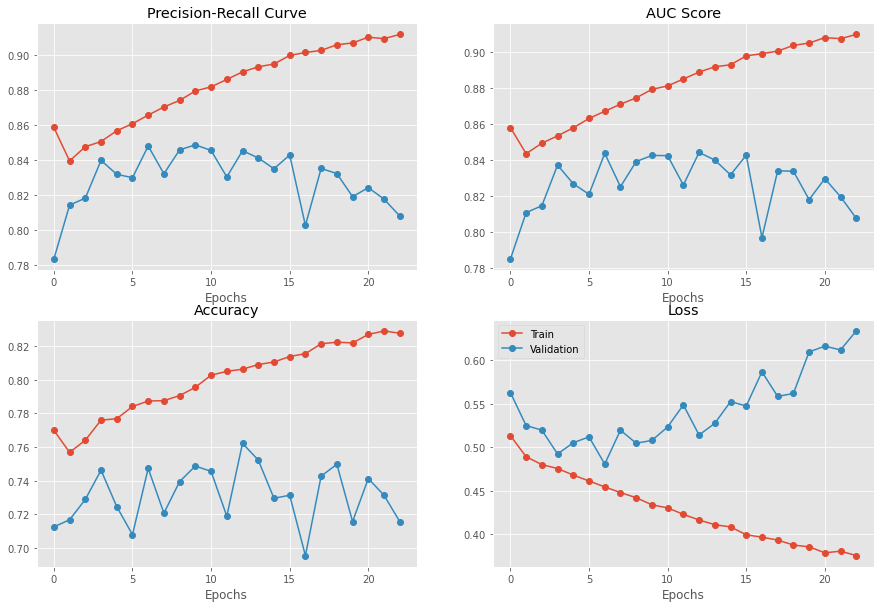

In [63]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
plt.title('Precision-Recall Curve')
plt.plot(histories.history['prc'], label='Train', marker='o')
plt.plot(histories.history['val_prc'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.subplot(2,2,2)
plt.title('AUC Score')
plt.plot(histories.history['auc'], label='Train', marker='o')
plt.plot(histories.history['val_auc'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.subplot(2,2,3)
plt.title('Accuracy')
plt.plot(histories.history['accuracy'], label='Train', marker='o')
plt.plot(histories.history['val_accuracy'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.subplot(2,2,4)
plt.title('Loss')
plt.plot(histories.history['loss'], label='Train', marker='o')
plt.plot(histories.history['val_loss'], label='Validation', marker='o')
plt.xlabel('Epochs')
plt.legend();

# Model Evaluation :

In [65]:
print("Non-oversampling :")
print(classification_report(y_test, np.argmax(model.predict(mX_test), axis=-1)))
print("Oversampling method :")
print(classification_report(y_test, np.argmax(clfs.predict(mX_test), axis=-1)))
print("Sk-Learn Pipeline method :")
print(classification_report(y_test, pipeline.predict(X_test)))

Non-oversampling :
              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1061
           1       0.47      0.81      0.60       348

    accuracy                           0.73      1409
   macro avg       0.70      0.76      0.70      1409
weighted avg       0.81      0.73      0.75      1409

Oversampling method :
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      1061
           1       0.50      0.73      0.59       348

    accuracy                           0.75      1409
   macro avg       0.69      0.74      0.70      1409
weighted avg       0.80      0.75      0.76      1409

Sk-Learn Pipeline method :
              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1061
           1       0.59      0.60      0.60       348

    accuracy                           0.80      1409
   macro avg       0.73      0.73      0.73      1409
weight

### ANN :
- Karena data bersifat imbalance, akan di fokuskan ke precision-recall curve (jika menggunakan akurasi, bisa mengalami misleading).
- Dari hasil ANN, ANN membuat hasil yang bagus (dalam arti kondisi dalam model tidak mengalami overfit maupun underfit), namun tidak mengeluarkan hasil yang memuaskan. Ini bisa dikarenakan data yang tidak cukup banyak. Neural Network perlu observasi yang banyak untuk menghasilkan hasil yang akurat.

### Over-Sampling ANN :
- Meskipun hasil jauh lebih bagus dari ANN dengan dataset yang imbalance, model telah mengalami overfit (dari segi akurasi maupun loss). early stopping yang ditargetkan adalah akurasi, ini dikarenakan dataset bersifat imbalance karena sudah digunakan teknik resampling.

### Model dengan Pipeline :
- Karena model tidak bisa dilakukan validation_data, maupun historis, tidak bisa dilakukan evaluasi model yang tepat, karena kesimpulan yang ditarik bisa misleading.

# Model Saving & Load :

In [ ]:
# # Save model
# model.save('my_model.h5')

# # Load model
# reconstructed_model = keras.models.load_model("my_model.h5")